In [54]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm 
%matplotlib inline 

from scipy.stats import gaussian_kde
from numpy.linalg import norm

    A - размер зоны
    q - lambda для распределения пуассона
    cir_r - радиус круга 
    dist - расстояние между объектами

In [55]:
guard_size = 10
poisson_lam_block = 0.3
cir_r = 0.5
dist_tx_rx = 3
# list_point = np.array

<h4> Drawing first circle </h4>

In [56]:
def plot_circle(x,y,r):
    angels = np.linspace(0,2*np.pi,50)
    cirX = x+r*np.cos(angels)
    cirY = y+r*np.sin(angels)
    plt.plot(cirX, cirY, "aqua")


<h4> Initializing Poisson  </h4>

In [57]:
def poisson_point_process(lambda0 , area_size):
    Number_block = np.random.poisson(lambda0 * area_size**2)
    x = np.random.uniform(0 , area_size , size = Number_block)
    y = np.random.uniform(0 , area_size , size = Number_block)
    return x,y


<h4> Rectangles around the lane(прямая видимости) 

    Using angles we calculate sides for our rectangle, by sin and cos of angle between two sides.


 </h4>



In [58]:
def draw_rect(x1,y1,x2,y2,angle):
    diff_angle = 2*np.pi - angle
    reverse_angle = np.pi/2 - diff_angle
    opp_angle = reverse_angle + np.pi
    xA = x1 + cir_r * np.cos(opp_angle)
    yA = y1 + cir_r * np.sin(opp_angle)
    xB = x1 + cir_r * np.cos(reverse_angle)
    yB = y1 + cir_r * np.sin(reverse_angle)
    xC = x2 + cir_r * np.cos(reverse_angle)
    yC = y2 + cir_r * np.sin(reverse_angle)
    xD = x2 + cir_r * np.cos(opp_angle)
    yD = y2 + cir_r * np.sin(opp_angle)
    
    return xA, yA, xB, yB, xC, yC, xD, yD
  

<h4> Check distance

    Vector or matrix form of distance using norm()

    We calculate crossing of the events



  </h4>

In [59]:
def check_dist(a,b,c):
    ca = (c-a) / norm(c-a)
    ba = (b-a) / norm(b-a)
    cb = (c-b) / norm(c-b)
    ab = (a-b) / norm(a-b)
    
    if np.arccos(np.dot(ca,ba)) > 1:
        return norm(c-a)
    if np.arccos(np.dot(cb,ab)) > 1:
        return norm(c-b)
    return norm(np.cross(a-b, a-c)) / norm(b-a)

<h4> Check if they cross  </h4>

In [60]:
def iscrossing():
    for i in range(len(x)):
        if np.round(check_dist(np.array([x1,y1]),np.array([x2,y2]),np.array([x[i], y[i]])), 1) <= cir_r:
            return True
        

##### Laboratory 5
##### ------------

Задание. В условиях предыдущей лабораторной работы №4, на двух точках, между которыми производится проверка прямой видимости, формируется диаграмма направленности, задающаяся вектором направления и углом. Предполагается, что если для обеих из рассматриваемых точек вторая точка лежит внутри сектора, описанного вектором и углом и линия прямой видимости между ними не заблокирована, то точки находятся в области видимости друг друга. При условии, что направление вектора диаграммы задается случайно равномерно распределенной величиной от 0 до 2 Pi, а угол является константой, определить находятся ли рассматриваемые точки в области видимости друг друга. На основе 1000 реализаций определить вероятность нахождения точек в области видимости друг друга. Полученный результат сравнить с результатами математической модели.



    ang_dist - расстояния на графике длины линий видимости
    ang_size - размер угла видимости

In [61]:
ang_dist = 3
ang_size = np.pi/2

We draw the angles and return the coordinates

In [62]:
def plot_angl(x1,y1, rand_angl, draw=True):
    x2 = x1 + ang_dist * np.cos(rand_angl)
    y2 = y1 + ang_dist * np.sin(rand_angl)
    x3 = x1 + ang_dist * np.cos(rand_angl + ang_size)
    y3 = y1 + ang_dist * np.sin(rand_angl + ang_size)
    if draw:
        plt.plot([x1,x2], [y1,y2], "--b", )
        plt.plot([x1,x3], [y1,y3], "--b", )
        return x2,y2,x3,y3
    else:
        return x2,y2,x3,y3

Conversion of cart coordinates to polar.

In [63]:
def cart_to_pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

If two objects in the range of vision we return True

In [64]:
def check_visibility():
    r1 = cart_to_pol(a1x2-x1, a1y2-y1)[1] if cart_to_pol(a1x2-x1, a1y2-y1)[1] >= 0 else cart_to_pol(a1x2-x1, a1y2-y1)[1] + np.pi*2
    g1 = cart_to_pol(x2-x1, y2-y1)[1] if cart_to_pol(x2-x1, y2-y1)[1] >= 0 else cart_to_pol(x2-x1, y2-y1)[1] + np.pi*2
    b1 = cart_to_pol(a1x3-x1, a1y3-y1)[1] if cart_to_pol(a1x3-x1, a1y3-y1)[1] >= 0 else cart_to_pol(a1x3-x1, a1y3-y1)[1] + np.pi*2
    
    r2 = cart_to_pol(a2x2-x2, a2y2-y2)[1] if cart_to_pol(a2x2-x2, a2y2-y2)[1] >= 0 else cart_to_pol(a2x2-x2, a2y2-y2)[1] + np.pi*2
    g2 = cart_to_pol(x1-x2, y1-y2)[1] if cart_to_pol(x1-x2, y1-y2)[1] >= 0 else cart_to_pol(x1-x2, y1-y2)[1] + np.pi*2
    b2 = cart_to_pol(a2x3-x2, a2y3-y2)[1] if cart_to_pol(a2x3-x2, a2y3-y2)[1] >= 0 else cart_to_pol(a2x3-x2, a2y3-y2)[1] + np.pi*2
    
    if g1 > r1 and g1 < b1 and g2 > r2 and g2 < b2: 
        return True
    else:
        return False

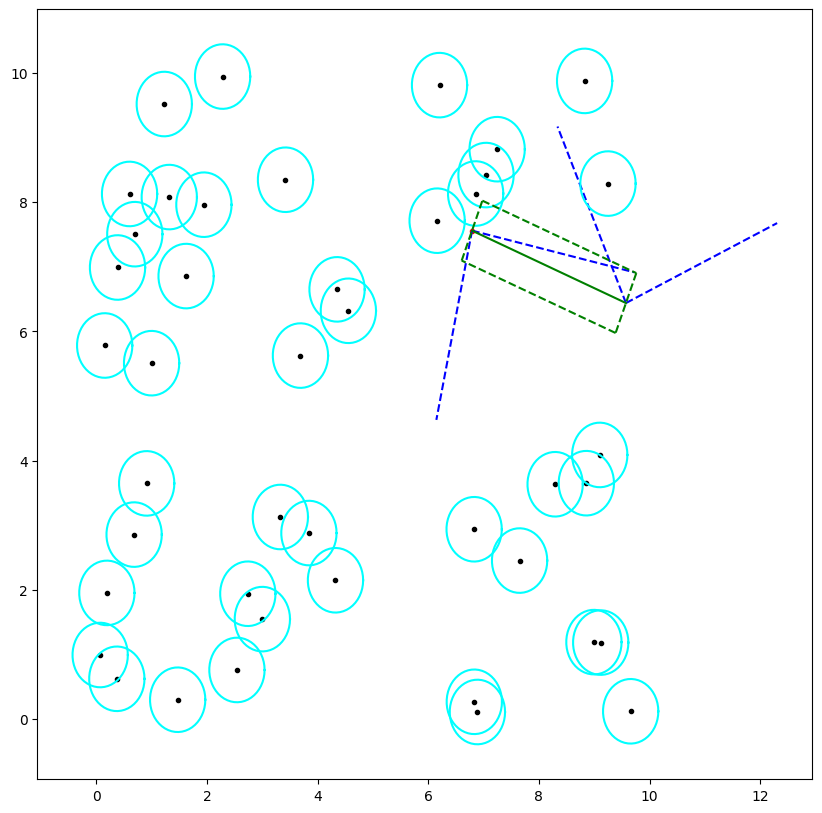

In [65]:
# circle cents
x_cir,y_cir = poisson_point_process(poisson_lam_block, guard_size)

# line angel 
angl = np.random.uniform(0, 2*np.pi)

# line coords
x1,y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)
x2 = x1 + dist_tx_rx * np.cos(angl)
y2 = y1 + dist_tx_rx * np.sin(angl)

# rect coords 
xA, yA, xB, yB, xC, yC, xD, yD = draw_rect(x1,y1,x2,y2,angl)

plt.figure(figsize=(10,10))
plt.plot(x1,y1,".r")

#plot angles
a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi))
a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi))

# plot circles
plt.plot(x_cir, y_cir, ".k")
for i in range(len(x_cir)):
    plot_circle(x_cir[i], y_cir[i], cir_r)

# plot line
plt.plot([x1,x2], [y1,y2], "-g")



# plot rect
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")

We check if they do cross

In [66]:
if iscrossing():
    print("Blocked")
else:
    print("Free")
    
if check_visibility():
    print("Visible")
else:
    print("NOT visible")

Blocked
NOT visible


На основе 1000 реализаций определить вероятность нахождения точек в 
области видимости друг друга. Полученный результат сравнить с результатами 
математической модели.

In [67]:
N = 1000
cnt = 0

for i in range(N):
    # circle cents
    x,y = poisson_point_process(poisson_lam_block, guard_size)

    # line angel 
    angl = np.random.uniform(0, 2*np.pi)

    # line coords
    x1,y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)
    x2 = x1 + dist_tx_rx * np.cos(angl)
    y2 = y1 + dist_tx_rx * np.sin(angl)
    
    # visibility lines
    a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi), draw=False)
    a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi), draw=False)
    
    if iscrossing() and check_visibility():
        cnt += 1
print(cnt/N)

0.02
